In [1]:
transitions_bs = [
    'B+ -> K+ a',
    'B0 -> K0 a',
    'B0 -> K*0 a',
    'Bs -> phi a',
    'B+ -> K+ gamma gamma',
    'B+ -> K+ e e',
    'B0 -> K*0 e e',
    'B+ -> K+ mu mu',
    'B0 -> K*0 mu mu',
    'B+ -> K+ tau tau',
    'B0 -> K*0 tau tau',
    'B+ -> K+ pi0 pi+ pi-',
    #'B0 -> K*0 pi0 pi+ pi-',
    'B+ -> K+ eta pi+ pi-',
    'Bs -> e e',
    'Bs -> mu mu',
    'Bs -> tau tau',
]

transitions_bd = [
    'B+ -> pi+ a',
    'B0 -> pi0 a',
    'B0 -> rho0 a',
    'B+ -> rho+ a',
    'B+ -> pi+ e e',
    'B0 -> pi0 e e',
    'B+ -> pi+ mu mu',
    'B0 -> pi0 mu mu',
    'B0 -> e e',
    'B0 -> mu mu',
    'B0 -> tau tau',
]

transitions_sd = [
    'K+ -> pi+ a',
    'KL -> pi0 a',
    'K+ -> pi+ gamma gamma',
    'K+ -> pi+ e e',
    'K+ -> pi+ mu mu',
    'KL -> e e',
    'KL -> mu mu',
    'KS -> e e',
    'KS -> mu mu',
]

transitions_cu = [
    'D0 -> pi0 a',
    'D0 -> pi0 e e',
    'D0 -> eta e e',
    'D0 -> rho0 e e',
    'D+ -> pi+ e e',
    'Ds+ -> K+ e e',
    'D0 -> pi0 mu mu',
    'D0 -> eta mu mu',
    'D0 -> rho0 mu mu',
    'D+ -> pi+ mu mu',
    'D+ -> rho+ mu mu',
    'Ds+ -> K+ mu mu',
]

transitions_quarkonia = [
    'J/psi -> gamma a',
    'Y(1S) -> gamma a',
    'Y(3S) -> gamma a',
    'J/psi -> gamma gamma gamma',
    ('e e -> gamma gamma gamma', 10.58**2),
    'J/psi -> gamma mu mu',
    'Y(1S) -> gamma mu mu',
    'Y(3S) -> gamma mu mu',
    'Y(1S) -> gamma tau tau',
    'Y(3S) -> gamma tau tau',
    'Y(3S) -> gamma hadrons',
    'Y(1S) -> gamma c c'
]

transitions = transitions_bs + transitions_bd + transitions_sd + transitions_cu + transitions_quarkonia

tex = {
    'bsa': r'$b\to s a$',
    'bda': r'$b\to d a$',
    'sda': r'$s\to d a$',
    'cua': r'$c\to u a$',
    'quarkonia': r'$q\overline{q}\to \gamma a$',
}

In [2]:
import alpaca
from alpaca.plotting.mpl import exclusionplot
import numpy as np

In [3]:
ma = np.logspace(-2, 1, 100)

# Wilson coefficients

## $c_g$

In [43]:
couplings_cg1TeV = alpaca.ALPcouplings({'cg': 1.0}, 1e3, 'derivative_above').match_run(10.1, 'VA_below')

In [44]:
fa = np.logspace(0, 7, 50)

x_ma, y_fa = np.meshgrid(ma, fa)

In [ ]:
chi2_cg1TeV = alpaca.statistics.get_chi2(transitions, x_ma, couplings_cg1TeV, y_fa, integrator='leadinglog')

In [46]:
chi2summ_cg1TeV = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cg1TeV.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cg1TeV.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cg1TeV.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cg1TeV.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cg1TeV.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_cg1TeV[('', 'Global')]
}

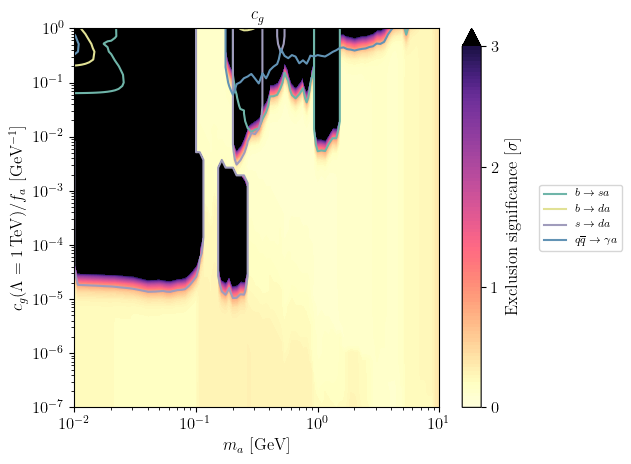

In [47]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_cg1TeV,
    r'$m_a$ [GeV]', r'$c_g(\Lambda = 1\,\mathrm{TeV})/f_a$ [GeV$^{-1}$]',
    r'$c_g$',
    tex=tex
)

In [48]:
couplings_cg1e9 = alpaca.ALPcouplings({'cg': 1.0}, 1e9, 'derivative_above').match_run(10.1, 'VA_below')

In [ ]:
chi2_cg1e9 = alpaca.statistics.get_chi2(transitions, x_ma, couplings_cg1e9, y_fa, integrator='leadinglog')

In [50]:
chi2summ_cg1e9 = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cg1e9.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cg1e9.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cg1e9.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cg1e9.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cg1e9.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_cg1e9[('', 'Global')]
}

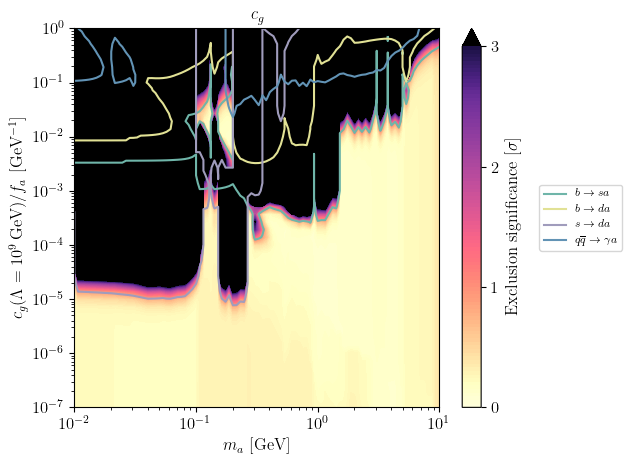

In [51]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_cg1e9,
    r'$m_a$ [GeV]', r'$c_g(\Lambda = 10^9\,\mathrm{GeV})/f_a$ [GeV$^{-1}$]',
    r'$c_g$',
    tex=tex
)

## $c_B$

In [52]:
couplings_cB1TeV = alpaca.ALPcouplings({'cB': 1.0}, 1e3, 'derivative_above').match_run(10.1, 'VA_below')

In [ ]:
chi2_cB1TeV = alpaca.statistics.get_chi2(transitions, x_ma, couplings_cB1TeV, y_fa, integrator='leadinglog')

In [54]:
chi2summ_cB1TeV = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cB1TeV.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cB1TeV.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cB1TeV.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cB1TeV.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cB1TeV.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_cB1TeV[('', 'Global')]
}

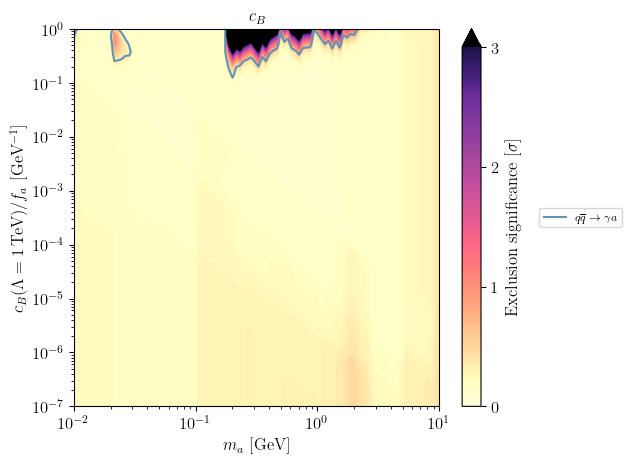

In [55]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_cB1TeV,
    r'$m_a$ [GeV]', r'$c_B(\Lambda = 1\,\mathrm{TeV})/f_a$ [GeV$^{-1}$]',
    r'$c_B$',
    tex=tex
)

In [56]:
couplings_cB1e9 = alpaca.ALPcouplings({'cB': 1.0}, 1e9, 'derivative_above').match_run(10.1, 'VA_below')

In [57]:
chi2_cB1e9 = alpaca.statistics.get_chi2(transitions, x_ma, couplings_cB1e9, y_fa, integrator='leadinglog')

In [58]:
chi2summ_cB1e9 = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cB1e9.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cB1e9.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cB1e9.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cB1e9.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cB1e9.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_cB1e9[('', 'Global')]
}

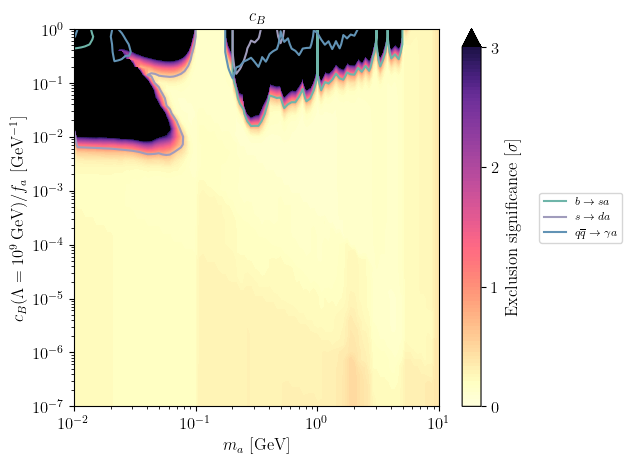

In [59]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_cB1e9,
    r'$m_a$ [GeV]', r'$c_B(\Lambda = 10^9\,\mathrm{GeV})/f_a$ [GeV$^{-1}$]',
    r'$c_B$',
    tex=tex
)

## $c_W$

In [60]:
couplings_cW1TeV = alpaca.ALPcouplings({'cW': 1.0}, 1e3, 'derivative_above').match_run(10.1, 'VA_below')

In [ ]:
chi2_cW1TeV = alpaca.statistics.get_chi2(transitions, x_ma, couplings_cW1TeV, y_fa, integrator='leadinglog')

In [62]:
chi2summ_cW1TeV = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cW1TeV.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cW1TeV.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cW1TeV.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cW1TeV.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cW1TeV.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_cW1TeV[('', 'Global')]
}

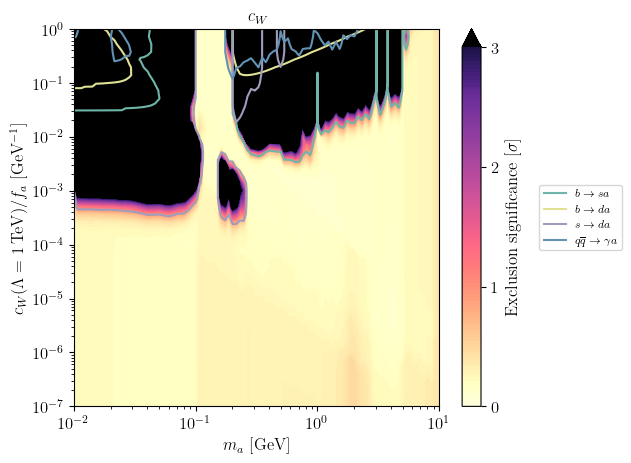

In [63]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_cW1TeV,
    r'$m_a$ [GeV]', r'$c_W(\Lambda = 1\,\mathrm{TeV})/f_a$ [GeV$^{-1}$]',
    r'$c_W$',
    tex=tex
)

In [64]:
couplings_cW1e9 = alpaca.ALPcouplings({'cW': 1.0}, 1e9, 'derivative_above').match_run(10.1, 'VA_below')

In [ ]:
chi2_cW1e9 = alpaca.statistics.get_chi2(transitions, x_ma, couplings_cW1e9, y_fa, integrator='leadinglog')

In [66]:
chi2summ_cW1e9 = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cW1e9.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cW1e9.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cW1e9.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cW1e9.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cW1e9.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_cW1e9[('', 'Global')]
}

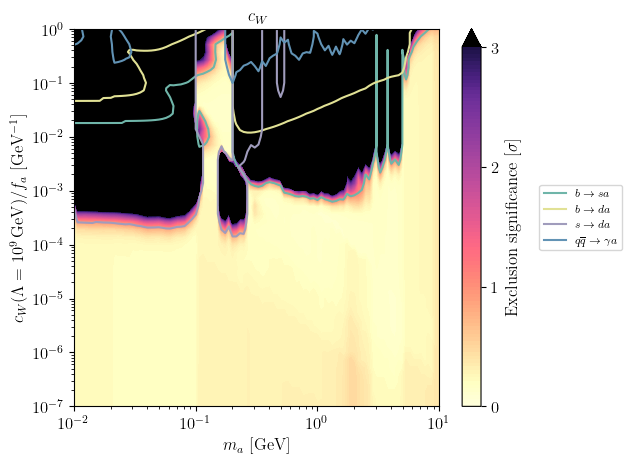

In [67]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_cW1e9,
    r'$m_a$ [GeV]', r'$c_W(\Lambda = 10^9\,\mathrm{GeV})/f_a$ [GeV$^{-1}$]',
    r'$c_W$',
    tex=tex
)

## $c_{q_L}$, universal

In [68]:
couplings_cqL1TeV = alpaca.ALPcouplings({'cqL': 1.0}, 1e3, 'derivative_above').match_run(10.1, 'VA_below')

In [ ]:
chi2_cqL1TeV = alpaca.statistics.get_chi2(transitions, x_ma, couplings_cqL1TeV, y_fa, integrator='leadinglog')

In [70]:
chi2summ_cqL1TeV = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cqL1TeV.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cqL1TeV.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cqL1TeV.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cqL1TeV.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cqL1TeV.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_cqL1TeV[('', 'Global')]
}

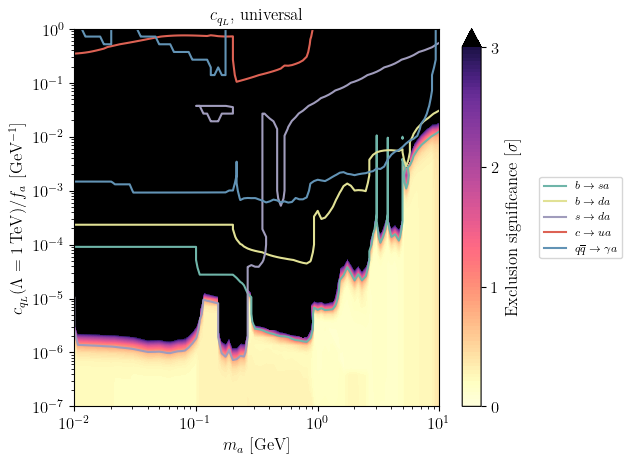

In [71]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_cqL1TeV,
    r'$m_a$ [GeV]', r'$c_{q_L}(\Lambda = 1\,\mathrm{TeV})/f_a$ [GeV$^{-1}$]',
    r'$c_{q_L}$, universal',
    tex=tex
)

In [72]:
couplings_cqL1e9 = alpaca.ALPcouplings({'cqL': 1.0}, 1e9, 'derivative_above').match_run(10.1, 'VA_below')

In [ ]:
chi2_cqL1e9 = alpaca.statistics.get_chi2(transitions, x_ma, couplings_cqL1e9, y_fa, integrator='leadinglog')

In [74]:
chi2summ_cqL1e9 = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cqL1e9.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cqL1e9.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cqL1e9.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cqL1e9.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cqL1e9.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_cqL1e9[('', 'Global')]
}

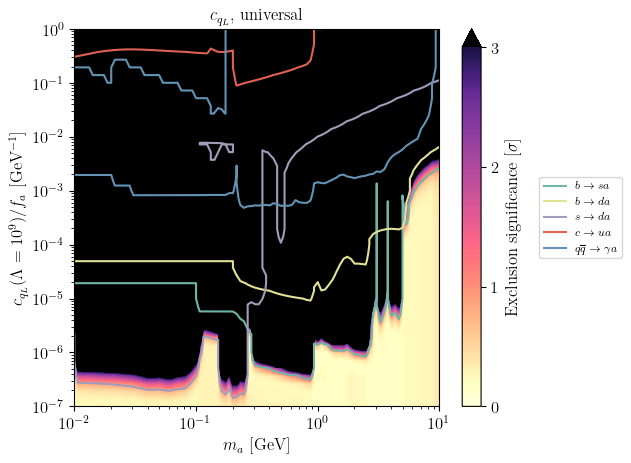

In [75]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_cqL1e9,
    r'$m_a$ [GeV]', r'$c_{q_L}(\Lambda = 10^9)/f_a$ [GeV$^{-1}$]',
    r'$c_{q_L}$, universal',
    tex=tex
)

## $d_R$ universal

In [78]:
couplings_cdR1TeV = alpaca.ALPcouplings({'cdR': 1.0}, 1e3, 'derivative_above').match_run(10.1, 'VA_below')

In [ ]:
chi2_cdR1TeV = alpaca.statistics.get_chi2(transitions, x_ma, couplings_cdR1TeV, y_fa, integrator='leadinglog')

In [80]:
chi2summ_cdR1TeV = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cdR1TeV.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cdR1TeV.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cdR1TeV.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cdR1TeV.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cdR1TeV.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_cdR1TeV[('', 'Global')]
}

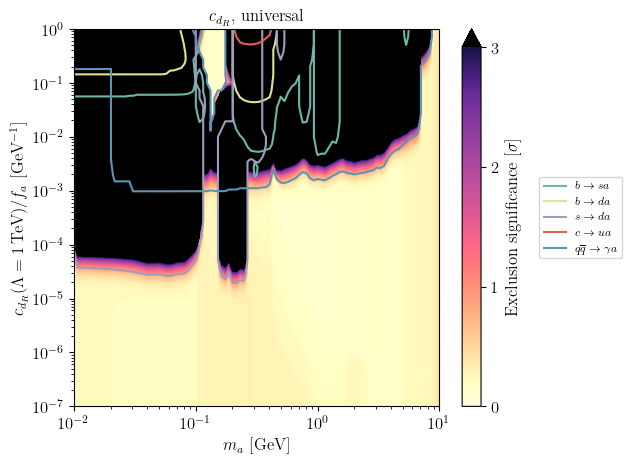

In [81]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_cdR1TeV,
    r'$m_a$ [GeV]', r'$c_{d_R}(\Lambda = 1\,\mathrm{TeV})/f_a$ [GeV$^{-1}$]',
    r'$c_{d_R}$, universal',
    tex=tex
)

In [82]:
couplings_cdR1e9 = alpaca.ALPcouplings({'cdR': 1.0}, 1e9, 'derivative_above').match_run(10.1, 'VA_below')

In [ ]:
chi2_cdR1e9 = alpaca.statistics.get_chi2(transitions, x_ma, couplings_cdR1e9, y_fa, integrator='leadinglog')

In [84]:
chi2summ_cdR1e9 = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cdR1e9.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cdR1e9.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cdR1e9.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cdR1e9.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cdR1e9.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_cdR1e9[('', 'Global')]
}

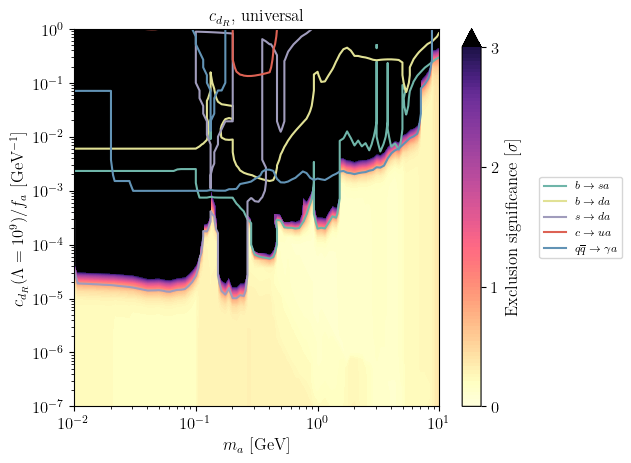

In [85]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_cdR1e9,
    r'$m_a$ [GeV]', r'$c_{d_R}(\Lambda = 10^9)/f_a$ [GeV$^{-1}$]',
    r'$c_{d_R}$, universal',
    tex=tex
)

## $c_{u_R}$, universal

In [86]:
couplings_cuR1TeV = alpaca.ALPcouplings({'cuR': 1.0}, 1e3, 'derivative_above').match_run(10.1, 'VA_below')

In [ ]:
chi2_cuR1TeV = alpaca.statistics.get_chi2(transitions, x_ma, couplings_cuR1TeV, y_fa, integrator='leadinglog')

In [88]:
chi2summ_cuR1TeV = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cuR1TeV.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cuR1TeV.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cuR1TeV.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cuR1TeV.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cuR1TeV.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_cuR1TeV[('', 'Global')]
}

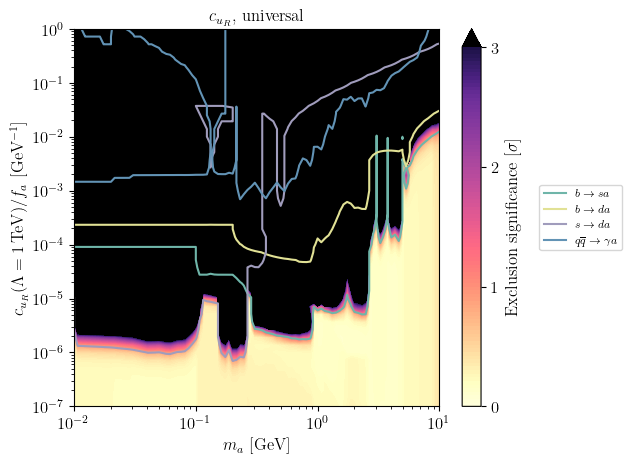

In [89]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_cuR1TeV,
    r'$m_a$ [GeV]', r'$c_{u_R}(\Lambda = 1\,\mathrm{TeV})/f_a$ [GeV$^{-1}$]',
    r'$c_{u_R}$, universal',
    tex=tex
)

In [90]:
couplings_cuR1e9 = alpaca.ALPcouplings({'cuR': 1.0}, 1e9, 'derivative_above').match_run(10.1, 'VA_below')

In [ ]:
chi2_cuR1e9 = alpaca.statistics.get_chi2(transitions, x_ma, couplings_cuR1e9, y_fa, integrator='leadinglog')

In [96]:
chi2summ_cuR1e9 = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cuR1e9.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cuR1e9.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cuR1e9.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cuR1e9.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_cuR1e9.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_cuR1e9[('', 'Global')]
}

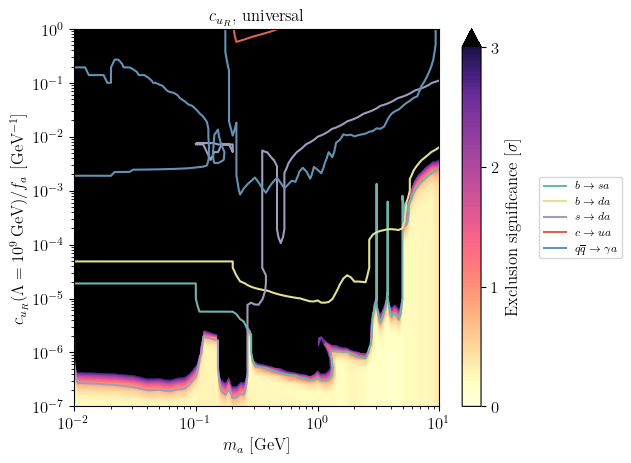

In [97]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_cuR1e9,
    r'$m_a$ [GeV]', r'$c_{u_R}(\Lambda = 10^9\,\mathrm{GeV})/f_a$ [GeV$^{-1}$]',
    r'$c_{u_R}$, universal',
    tex=tex
)

# Models

In [ ]:
fa = np.logspace(2.0001, 7, 50)

x_ma, y_fa = np.meshgrid(ma, fa)

## QED-DFSZ

In [4]:
couplings_QEDDFSZ = [
    alpaca.models.QED_DFSZ.get_couplings(
        {alpaca.models.beta: np.pi/4}, 4*np.pi*f
    ).match_run(
        10.01, 'VA_below'
    )
    for f in fa
]

_, y_couplings_QEDDFSZ = np.meshgrid(ma, couplings_QEDDFSZ)

In [ ]:
chi2_QEDDFSZ = alpaca.statistics.get_chi2(transitions, x_ma, y_couplings_QEDDFSZ, y_fa, integrator='leadinglog')

In [15]:
chi2summ_QEDDFSZ = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_QEDDFSZ.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_QEDDFSZ.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_QEDDFSZ.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_QEDDFSZ.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_QEDDFSZ.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_QEDDFSZ[('', 'Global')]
}

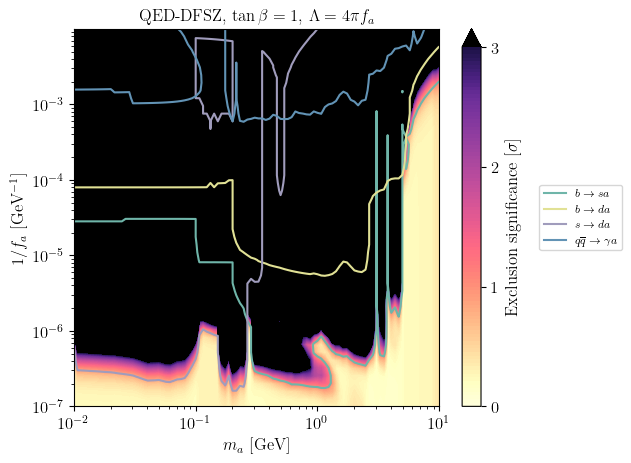

In [18]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_QEDDFSZ,
    r'$m_a$ [GeV]', r'$1/f_a$ [GeV$^{-1}$]',
    r'QED-DFSZ, $\tan\beta = 1$, $\Lambda = 4\pi f_a$',
    tex=tex
)

## $d$-DFSZ

In [19]:
couplings_dDFSZ = [
    alpaca.models.d_DFSZ.get_couplings(
        {alpaca.models.beta: np.pi/4}, 4*np.pi*f
    ).match_run(
        10.01, 'VA_below'
    )
    for f in fa
]

_, y_couplings_dDFSZ = np.meshgrid(ma, couplings_dDFSZ)

In [ ]:
chi2_dDFSZ = alpaca.statistics.get_chi2(transitions, x_ma, y_couplings_dDFSZ, y_fa, integrator='leadinglog')

In [21]:
chi2summ_dDFSZ = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_dDFSZ.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_dDFSZ.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_dDFSZ.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_dDFSZ.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_dDFSZ.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_dDFSZ[('', 'Global')]
}

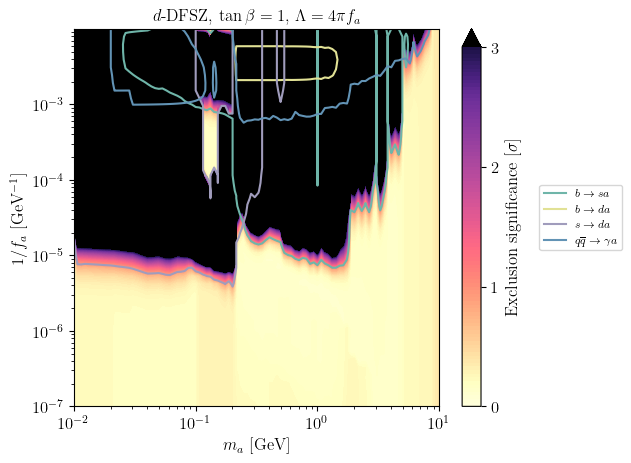

In [22]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_dDFSZ,
    r'$m_a$ [GeV]', r'$1/f_a$ [GeV$^{-1}$]',
    r'$d$-DFSZ, $\tan\beta = 1$, $\Lambda = 4\pi f_a$',
    tex=tex
)

## $u$-DFSZ

In [23]:
couplings_uDFSZ = [
    alpaca.models.u_DFSZ.get_couplings(
        {alpaca.models.beta: np.pi/4}, 4*np.pi*f
    ).match_run(
        10.01, 'VA_below'
    )
    for f in fa
]

_, y_couplings_uDFSZ = np.meshgrid(ma, couplings_uDFSZ)

In [ ]:
chi2_uDFSZ = alpaca.statistics.get_chi2(transitions, x_ma, y_couplings_uDFSZ, y_fa, integrator='leadinglog')

In [25]:
chi2summ_uDFSZ = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_uDFSZ.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_uDFSZ.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_uDFSZ.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_uDFSZ.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_uDFSZ.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_uDFSZ[('', 'Global')]
}

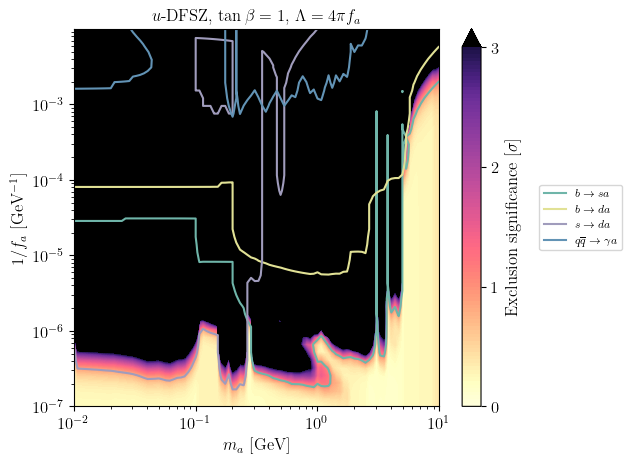

In [26]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_uDFSZ,
    r'$m_a$ [GeV]', r'$1/f_a$ [GeV$^{-1}$]',
    r'$u$-DFSZ, $\tan\beta = 1$, $\Lambda = 4\pi f_a$',
    tex=tex
)

## Q-KSVZ

In [27]:
couplings_QKSVZ = [
    alpaca.models.Q_KSVZ.get_couplings(
        {alpaca.models.KSVZ_charge: 1}, 4*np.pi*f
    ).match_run(
        10.01, 'VA_below'
    )
    for f in fa
]

_, y_couplings_QKSVZ = np.meshgrid(ma, couplings_QKSVZ)

In [ ]:
chi2_QKSVZ = alpaca.statistics.get_chi2(transitions, x_ma, y_couplings_QKSVZ, y_fa, integrator='leadinglog')

In [29]:
chi2summ_QKSVZ = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_QKSVZ.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_QKSVZ.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_QKSVZ.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_QKSVZ.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_QKSVZ.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_QKSVZ[('', 'Global')]
}

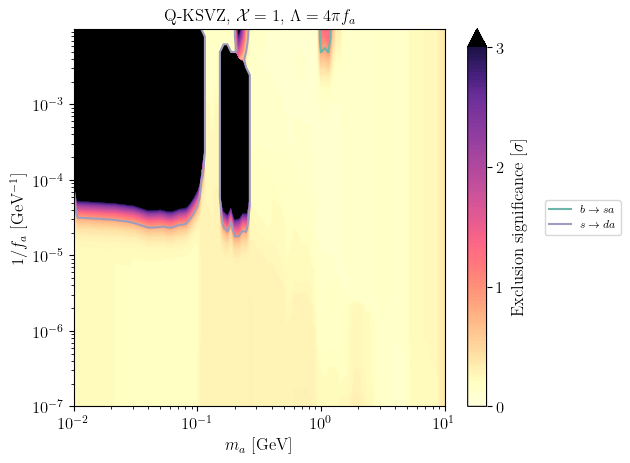

In [30]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_QKSVZ,
    r'$m_a$ [GeV]', r'$1/f_a$ [GeV$^{-1}$]',
    r'Q-KSVZ, $\mathcal{X} = 1$, $\Lambda = 4\pi f_a$',
    tex=tex
)

## L-KSVZ

In [31]:
couplings_LKSVZ = [
    alpaca.models.L_KSVZ.get_couplings(
        {alpaca.models.KSVZ_charge: 1}, 4*np.pi*f
    ).match_run(
        10.01, 'VA_below'
    )
    for f in fa
]

_, y_couplings_LKSVZ = np.meshgrid(ma, couplings_LKSVZ)

In [ ]:
chi2_LKSVZ = alpaca.statistics.get_chi2(transitions, x_ma, y_couplings_LKSVZ, y_fa, integrator='leadinglog')

In [33]:
chi2summ_LKSVZ = {
    'bsa': alpaca.statistics.combine_chi2(*(v for k, v in chi2_LKSVZ.items() if k[0] in transitions_bs)),
    'bda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_LKSVZ.items() if k[0] in transitions_bd)),
    'sda': alpaca.statistics.combine_chi2(*(v for k, v in chi2_LKSVZ.items() if k[0] in transitions_sd)),
    'cua': alpaca.statistics.combine_chi2(*(v for k, v in chi2_LKSVZ.items() if k[0] in transitions_cu)),
    'quarkonia': alpaca.statistics.combine_chi2(*(v for k, v in chi2_LKSVZ.items() if k[0] in transitions_quarkonia)),
    ('', 'Global'): chi2_LKSVZ[('', 'Global')]
}

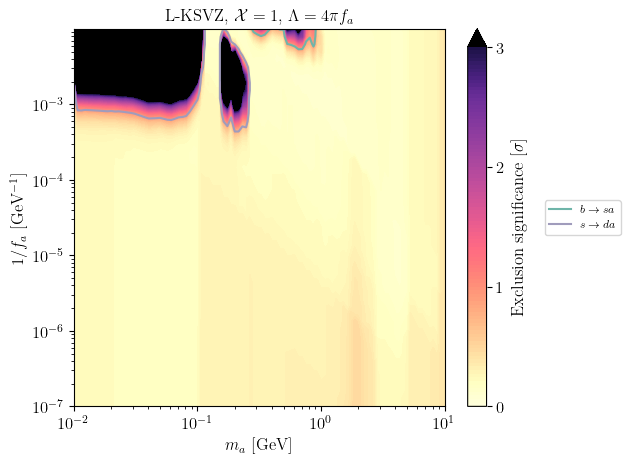

In [34]:
fig, ax = exclusionplot(
    x_ma, 1/y_fa, chi2summ_LKSVZ,
    r'$m_a$ [GeV]', r'$1/f_a$ [GeV$^{-1}$]',
    r'L-KSVZ, $\mathcal{X} = 1$, $\Lambda = 4\pi f_a$',
    tex=tex
)